<a href="https://colab.research.google.com/github/thoxinloi/ai/blob/main/FACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/FACE/TrainData/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/FACE/TrainData/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 908 images belonging to 10 classes.
Found 222 images belonging to 10 classes.


In [ ]:
# X_train.shape, y_train.shape,X_test.shape,y_test.shape
train_dataset.classes
train_dataset.class_indices

{'ChiPu': 0,
 'Justin': 1,
 'LanNgoc': 2,
 'Messi': 3,
 'Neymar': 4,
 'Putin': 5,
 'Robert Pattinson': 6,
 'Ronaldo': 7,
 'ThuyTien': 8,
 'TieuVy': 9}

In [ ]:
import numpy as np  #
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #  :batch... : chuan cua ANN
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical #  de dam bao do hcinh xac cao 
from keras import callbacks #
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score

In [ ]:
# Tạo mô hinh
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

In [ ]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.layers import Dense, Activation, Flatten


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(train_dataset,batch_size=32,epochs=200,verbose=1,validation_data=validation_dataset)

91/91 [==============================] - 37s 401ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 6.3965 - val_accuracy: 0.3829
Epoch 195/200
91/91 [==============================] - 32s 355ms/step - loss: 3.8363e-04 - accuracy: 1.0000 - val_loss: 6.2869 - val_accuracy: 0.3784
Epoch 196/200
91/91 [==============================] - 34s 372ms/step - loss: 0.0215 - accuracy: 0.9912 - val_loss: 6.1594 - val_accuracy: 0.3468
Epoch 197/200
91/91 [==============================] - 34s 371ms/step - loss: 0.0112 - accuracy: 0.9956 - val_loss: 7.2216 - val_accuracy: 0.3288
Epoch 198/200
91/91 [==============================] - 32s 358ms/step - loss: 0.0149 - accuracy: 0.9978 - val_loss: 5.7955 - val_accuracy: 0.3784
Epoch 199/200
91/91 [==============================] - 38s 423ms/step - loss: 0.0165 - accuracy: 0.9956 - val_loss: 5.1580 - val_accuracy: 0.3604
Epoch 200/200
91/91 [==============================] - 32s 354ms/step - loss: 0.0046 - accuracy: 0.9978 - val_loss: 6.2540 - val_accur

In [ ]:
model.save('FACE.h5')

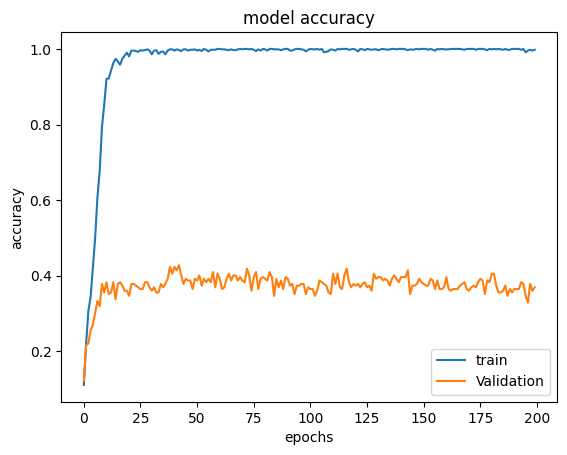

In [ ]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
#in sai so va do chinh xac
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  6.254027366638184
Độ chính xác  0.36936935782432556


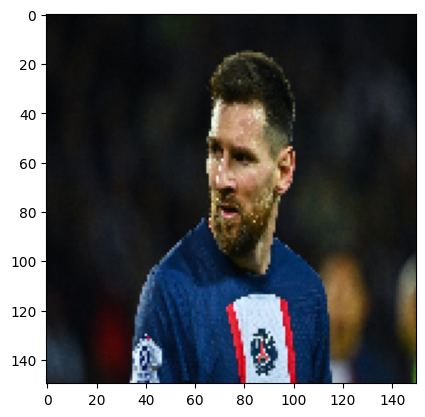

1/1 [==============================] - 0s 116ms/step
Lionel Messi


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/MyDrive/FACE/TestData/messi2-test.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Chi Pu")
if(kq==1):
    print("Justin Bieber")
if(kq==2):
    print("Ninh Dương Lan Ngọc")
if(kq==3):
    print("Lionel Messi")
if(kq==4):
    print("Neymar")
if(kq==5):
    print("Putin")
if(kq==6):
    print("Ronaldo")
if(kq==7):
    print("Hoa Hậu Thùy Tiên")
if(kq==8):
    print("Hoa Hậu Tiểu Vy")
if(kq==9):
    print("Robert Pattinson")

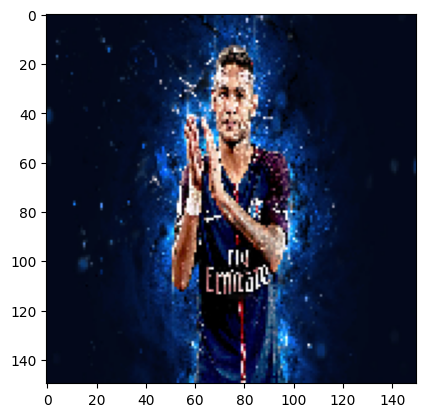

1/1 [==============================] - 0s 24ms/step
Neymar


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/MyDrive/FACE/TestData/0709_hinh-nen-neymar88.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Chi Pu")
if(kq==1):
    print("Justin Bieber")
if(kq==2):
    print("Ninh Dương Lan Ngọc")
if(kq==3):
    print("Lionel Messi")
if(kq==4):
    print("Neymar")
if(kq==5):
    print("Putin")
if(kq==6):
    print("Ronaldo")
if(kq==7):
    print("Hoa Hậu Thùy Tiên")
if(kq==8):
    print("Hoa Hậu Tiểu Vy")
if(kq==9):
    print("Robert Pattinson")